# Visual Analytics 
Μιχαλάκη Ελισάβετ <br>
Μάϊος, 2025 <br>
ΑΜ : ΜΠΚΕΔ24024 <br>

**Βήμα 1** : Φορτώνουμε τις κατάλληλες βιβλιοθήκες 

In [4]:
%pip install pandas matplotlib folium numpy seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Elisavet\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker

**Βήμα 2** : Φορτώνουμε τα δεδομένα 

In [6]:
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)
print(df.head())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

Με την εντολή info() βλέπουμε γενικές πληροφορίες σχετικά με το dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

Το dataset αποτελείται από 78 στήλες όπου η κάθε στήλη έχει συνολικά 50191 γραμμές (συμπερλιμβανομένων των null τιμών)

Η εντολή describe() εμφανίζει count, mean, min, max και άλλα στατιστικά στοιχεία για τις αριθμητικές στήλες.

In [8]:
print(df.describe())

               year    population           gdp    cement_co2  \
count  50191.000000  4.101900e+04  1.525100e+04  28863.000000   
mean    1919.883067  5.686141e+07  3.300495e+11      7.767746   
std       65.627296  3.199905e+08  3.086383e+12     62.595292   
min     1750.000000  2.150000e+02  4.998000e+07      0.000000   
25%     1875.000000  3.273130e+05  7.874038e+09      0.000000   
50%     1924.000000  2.289522e+06  2.743861e+10      0.000000   
75%     1974.000000  9.862459e+06  1.212627e+11      0.486000   
max     2023.000000  8.091735e+09  1.301126e+14   1696.308000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           25358.000000  29137.000000    26981.000000     26002.000000   
mean                0.059036    415.698178        6.208882        43.104462   
std                 0.120328   1945.843973       62.322553      1729.939596   
min                 0.000000      0.000000    -1977.750000      -100.000000   
25%                

**Βήμα 3** : Κρατάμε μόνο τις G20 χώρες 

In [9]:
g20_countries = [
    'Argentina', 'Australia', 'Brazil', 'Canada', 'China', 
    'France', 'Germany', 'India', 'Indonesia', 'Italy', 
    'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 
    'South Korea', 'Turkey', 'United Kingdom', 'United States'
]

In [10]:
g20_df = df[df['country'].isin(g20_countries)]

In [11]:
print(g20_df.sample(5))

         country  year iso_code   population           gdp  cement_co2  \
2184   Argentina  1894      ARG    3836189.0           NaN         NaN   
2301   Argentina  2011      ARG   41730655.0  8.377427e+11       4.586   
9772       China  1910      CHN  419058430.0           NaN         NaN   
23120      Italy  1859      ITA   25863255.0  6.594673e+10         NaN   
17112     France  1836      FRA   34251730.0  7.141411e+10         NaN   

       cement_co2_per_capita      co2  co2_growth_abs  co2_growth_prct  ...  \
2184                     NaN    1.947           0.276           16.537  ...   
2301                    0.11  189.775           3.829            2.059  ...   
9772                     NaN   25.009           0.758            3.125  ...   
23120                    NaN      NaN             NaN              NaN  ...   
17112                    NaN   10.637           1.378           14.879  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
2184     

Για να προχωρήσουμε στην οπτικοποίηση των δεδομένων θα πρέπει να εντοπίσουμε τις null τιμές και να τις αφαιρέσουμε

In [12]:
print(df.isnull().sum())

country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64


In [13]:
missing_values = g20_df.isnull().sum()

missing_percentage = (missing_values / len(g20_df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing': missing_percentage.values
})

missing_df_sorted = missing_df.sort_values('Missing', ascending=False)

print(missing_df_sorted[missing_df_sorted['Missing'] > 0])


                               Column    Missing
64  share_global_cumulative_other_co2  88.134228
69             share_global_other_co2  88.134228
32               cumulative_other_co2  85.020134
50                 other_industry_co2  85.020134
49               other_co2_per_capita  85.020134
..                                ...        ...
7                                 co2   9.691275
25                     cumulative_co2   9.691275
57        share_global_cumulative_co2   9.691275
53                   share_global_co2   9.691275
3                          population   3.006711

[76 rows x 2 columns]


Για να διατηρήσουμε έναν ικανοποιητικό αριθμό γραμμών, πρώτα θα αφαιρέσουμε τις στήλες όπου πάνω από το 30% των γραμμών τους είναι null και μετά, από τις στήλες που κρατήσαμε αφαιρούμε τις null γραμμές

In [14]:
columns_to_keep = missing_percentage[missing_percentage < 30].index.tolist()

In [15]:
g20_df_filtered = g20_df[columns_to_keep]

In [16]:
print(df.duplicated().sum())

0


In [17]:
g20_df_filtered

,country,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_cumulative_oil_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
2140,Argentina,1850,ARG,1088372.0,2.193400e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,0.439,NaN,NaN,NaN,NaN,NaN,NaN,30.306,0.599
2141,Argentina,1851,ARG,1115018.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.430,NaN,0.851,0.000,0.000,0.000,0.000,31.370,0.610
2142,Argentina,1852,ARG,1138141.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.421,NaN,0.858,0.000,0.000,0.000,0.000,32.277,0.621
2143,Argentina,1853,ARG,1157536.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.418,NaN,0.865,0.000,0.000,0.000,0.000,33.218,0.631
2144,Argentina,1854,ARG,1177263.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.419,NaN,0.871,0.000,0.000,0.000,0.000,34.165,0.642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47795,United States,2019,USA,337790068.0,1.854055e+13,5262.145,-115.652,-2.151,5320.308,-130.590,...,26.985,1.536,19.022,17.713,0.035,0.232,0.278,0.011,6216.229,5849.561
47796,United States,2020,USA,339436157.0,1.802736e+13,4714.628,-547.517,-10.405,4772.611,-547.697,...,26.831,1.686,18.681,17.591,0.035,0.235,0.280,0.011,5651.509,5262.847
47797,United States,2021,USA,340161441.0,1.909938e+13,5032.213,317.585,6.736,5125.842,353.231,...,26.690,2.635,19.416,17.472,0.035,0.237,0.283,0.011,6009.153,5590.518
47798,United States,2022,USA,341534041.0,1.949317e+13,5078.871,46.658,0.927,5181.144,55.302,...,26.540,2.888,18.963,17.356,0.035,0.239,0.285,0.011,6067.148,5650.342


In [18]:
final_df = g20_df_filtered.dropna()

In [19]:
final_df

,country,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_cumulative_oil_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
2180,Argentina,1890,ARG,3366831.0,1.300098e+10,1.453,-0.515,-26.173,24.602,1.300,...,0.000,0.586,0.000,1.223,0.000,0.001,0.001,0.000,83.709,2.803
2190,Argentina,1900,ARG,4685089.0,2.150802e+10,2.026,-0.617,-23.339,63.634,31.356,...,0.000,1.367,0.000,1.295,0.000,0.001,0.002,0.000,124.157,3.779
2191,Argentina,1901,ARG,4855502.0,2.237194e+10,2.408,0.382,18.856,83.808,20.174,...,0.000,1.796,0.000,1.309,0.001,0.001,0.002,0.000,135.743,4.241
2192,Argentina,1902,ARG,5036658.0,2.191486e+10,2.555,0.147,6.110,96.004,12.196,...,0.000,2.020,0.000,1.326,0.001,0.001,0.002,0.000,143.889,4.468
2193,Argentina,1903,ARG,5229108.0,2.505633e+10,2.923,0.368,14.397,105.068,9.064,...,0.000,2.222,0.000,1.343,0.001,0.001,0.002,0.000,150.278,4.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47794,United States,2018,USA,335056495.0,1.812469e+13,5377.797,165.635,3.178,5450.898,112.638,...,27.158,1.901,19.317,17.834,0.035,0.230,0.276,0.011,6305.474,5953.741
47795,United States,2019,USA,337790068.0,1.854055e+13,5262.145,-115.652,-2.151,5320.308,-130.590,...,26.985,1.536,19.022,17.713,0.035,0.232,0.278,0.011,6216.229,5849.561
47796,United States,2020,USA,339436157.0,1.802736e+13,4714.628,-547.517,-10.405,4772.611,-547.697,...,26.831,1.686,18.681,17.591,0.035,0.235,0.280,0.011,5651.509,5262.847
47797,United States,2021,USA,340161441.0,1.909938e+13,5032.213,317.585,6.736,5125.842,353.231,...,26.690,2.635,19.416,17.472,0.035,0.237,0.283,0.011,6009.153,5590.518


Επιπλέον, για τη σωστή οπτικοποίηση των δεδομένων θα μετατρέψουμε τη στήλη Year σε datetime μορφή

In [20]:
g20_df_filtered['year'] = pd.to_datetime(g20_df_filtered['year'], format='%Y')

C:\Users\Elisavet\AppData\Local\Temp\ipykernel_2004\2917437451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g20_df_filtered['year'] = pd.to_datetime(g20_df_filtered['year'], format='%Y')


In [21]:
final_df 

,country,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_cumulative_oil_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
2180,Argentina,1890,ARG,3366831.0,1.300098e+10,1.453,-0.515,-26.173,24.602,1.300,...,0.000,0.586,0.000,1.223,0.000,0.001,0.001,0.000,83.709,2.803
2190,Argentina,1900,ARG,4685089.0,2.150802e+10,2.026,-0.617,-23.339,63.634,31.356,...,0.000,1.367,0.000,1.295,0.000,0.001,0.002,0.000,124.157,3.779
2191,Argentina,1901,ARG,4855502.0,2.237194e+10,2.408,0.382,18.856,83.808,20.174,...,0.000,1.796,0.000,1.309,0.001,0.001,0.002,0.000,135.743,4.241
2192,Argentina,1902,ARG,5036658.0,2.191486e+10,2.555,0.147,6.110,96.004,12.196,...,0.000,2.020,0.000,1.326,0.001,0.001,0.002,0.000,143.889,4.468
2193,Argentina,1903,ARG,5229108.0,2.505633e+10,2.923,0.368,14.397,105.068,9.064,...,0.000,2.222,0.000,1.343,0.001,0.001,0.002,0.000,150.278,4.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47794,United States,2018,USA,335056495.0,1.812469e+13,5377.797,165.635,3.178,5450.898,112.638,...,27.158,1.901,19.317,17.834,0.035,0.230,0.276,0.011,6305.474,5953.741
47795,United States,2019,USA,337790068.0,1.854055e+13,5262.145,-115.652,-2.151,5320.308,-130.590,...,26.985,1.536,19.022,17.713,0.035,0.232,0.278,0.011,6216.229,5849.561
47796,United States,2020,USA,339436157.0,1.802736e+13,4714.628,-547.517,-10.405,4772.611,-547.697,...,26.831,1.686,18.681,17.591,0.035,0.235,0.280,0.011,5651.509,5262.847
47797,United States,2021,USA,340161441.0,1.909938e+13,5032.213,317.585,6.736,5125.842,353.231,...,26.690,2.635,19.416,17.472,0.035,0.237,0.283,0.011,6009.153,5590.518


**Βήμα 3** : Ξεκινάμε την διαδικασία οπτικοποιήσης των δεδομένων. Αρχικά, θα ρυθμίσουμε το στύλ των διαγραμμάτων

In [22]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("white")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.3
plt.rcParams['ytick.minor.width'] = 0.3

In [23]:
recent_year = final_df['year'].max()
recent_df = final_df[final_df['year'] == recent_year].copy()
recent_df = recent_df.sort_values(by='co2', ascending=False)

*1o Διάγραμμα* : Per Capita Emissions by Source <br>
Για την απεικόνηση της κατά κεφαλή εκπομπή CO2 ανά source θα χρησιμοποιήσουμε ένα stacked barplot, το οποίο θα μας διευκολύνει στο να συγκρίνουμε τις συνολικές εκπομπές των χωρών ενώ παράλληλα θα φαίνεται αν μια χώρα είναι περισσότερο εξαρτώμενη από τον άνθρακα το πετρέλαιο ή το φυσικό αέριο. 

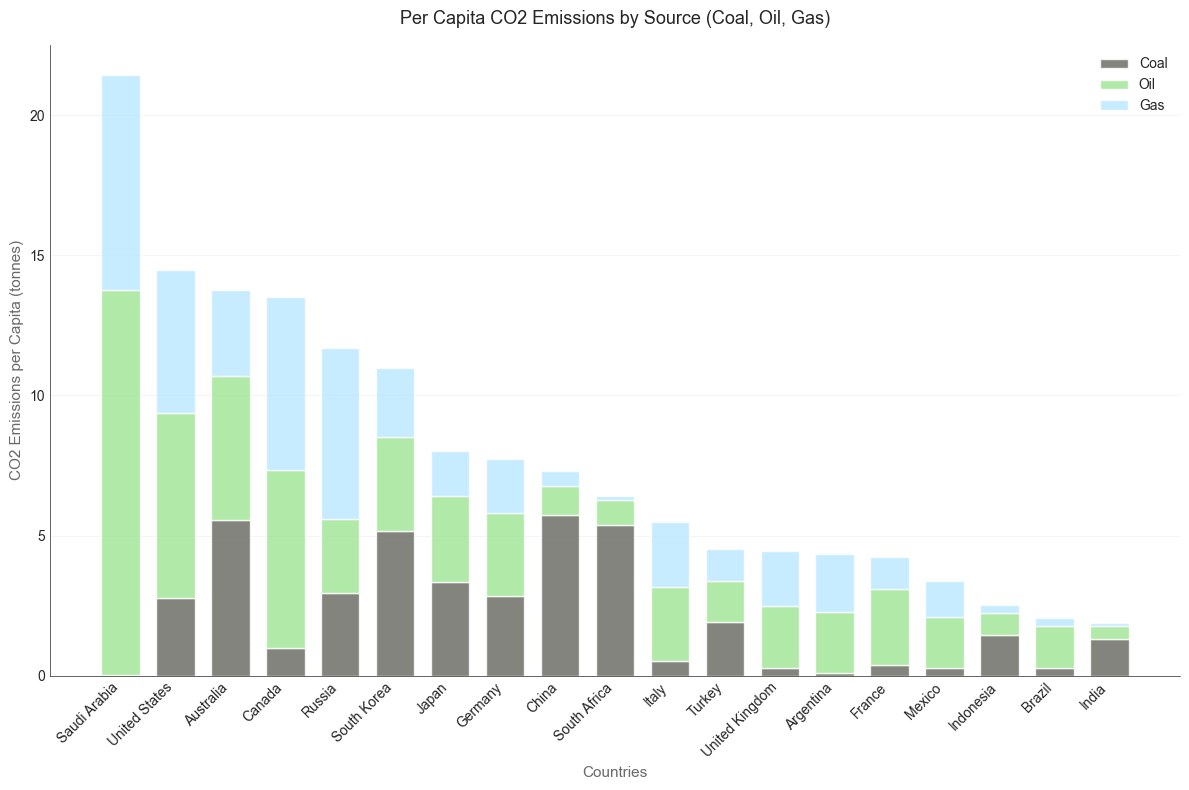

In [24]:
plt.figure(figsize=(12, 8))

countries = recent_df['country']
coal_per_capita = recent_df['coal_co2_per_capita'].fillna(0)
oil_per_capita = recent_df['oil_co2_per_capita'].fillna(0)
gas_per_capita = recent_df['gas_co2_per_capita'].fillna(0)

total_per_capita = coal_per_capita + oil_per_capita + gas_per_capita
sort_idx = total_per_capita.sort_values(ascending=False).index
recent_df_sorted = recent_df.loc[sort_idx]

x = range(len(recent_df_sorted))
width = 0.7

plt.bar(x, recent_df_sorted['coal_co2_per_capita'].fillna(0), 
        width, label='Coal', color='#65655E', alpha=0.8)
plt.bar(x, recent_df_sorted['oil_co2_per_capita'].fillna(0), 
        width, bottom=recent_df_sorted['coal_co2_per_capita'].fillna(0),
        label='Oil', color='#9EE493', alpha=0.8)
plt.bar(x, recent_df_sorted['gas_co2_per_capita'].fillna(0), 
        width, bottom=recent_df_sorted['coal_co2_per_capita'].fillna(0) + 
                     recent_df_sorted['oil_co2_per_capita'].fillna(0),
        label='Gas', color='#B9E6FF', alpha=0.8)

plt.xlabel('Countries', fontsize=11, color='dimgrey')
plt.ylabel('CO2 Emissions per Capita (tonnes)', fontsize=11, color='dimgrey')
plt.title('Per Capita CO2 Emissions by Source (Coal, Oil, Gas)', 
         fontsize=13, pad=15, fontweight='light')
plt.xticks(x, recent_df_sorted['country'], rotation=45, ha='right')
plt.legend(frameon=False)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Ο άξονας x μας δείχνει τις χώρες, ενώ ο άξονας y την κατά κεφαλή εκπομπή CO2. To γκρί δείχνει τις εκπομπές από άνθρακα, το πράσινο από πετρέλαιο και το μπλέ από φυσικό αέριο. Φαίνεται ότι η Σαουδική Αραβία, η Αμερική και η Αυστραλία έχουν τις μεγαλύτερες εκπομπές άνθρακα ανά άτομο. Ενώ για τις πηγές ενέργειας καταλαβαίνουμε ότι η Νότια Αφρική βασίζεται περισσότερο από τις υπόλοιπες χώρες στον άνθρακα.

*Διάγραμμα 2*: Temperature Attribution by Country <br>
Για την απεικόνηση της μεταβολής της θερμοκρασίας από το CO2 ανά χώρα για το τελευταίο διαθέσιμο έτος θα χρησιμοποιήσουμε ένα οριζόντιο barplot, το οποίο θα βοηθήσει στη σύγκριση της σχετικής μεταβολής κάθε χώρας στην αύξηση της θερμοκρασίας από τη μικρότερη στη μεγαλύτερη. Οι χώρες είναι ταξινομημένες κατά αύξουσα σειρά, δίνοντας έμφαση στο ποιες χώρες είχαν τον μεγαλύτερο αντίκτυπο στο κλίμα.


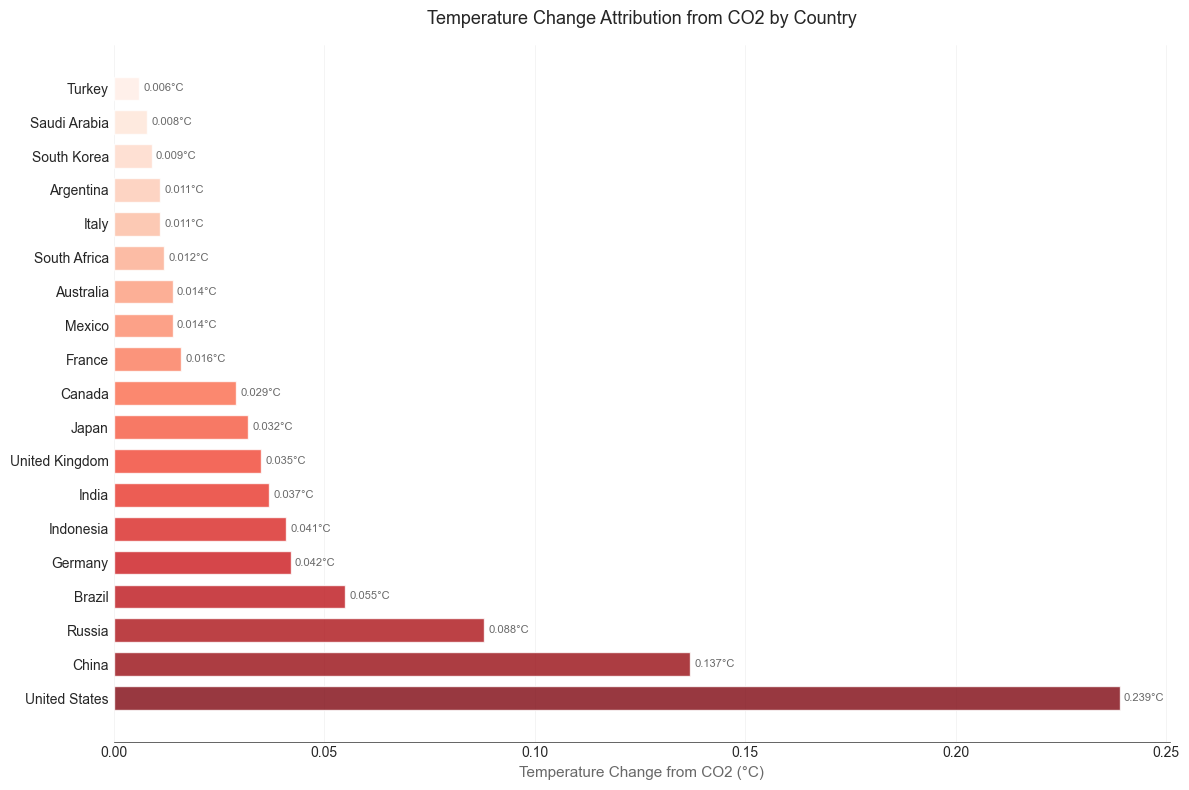

In [25]:

plt.figure(figsize=(12, 8))
 
temp_data = recent_df.dropna(subset=['temperature_change_from_co2'])
temp_data_sorted = temp_data.sort_values('temperature_change_from_co2', ascending=False)

colors = sns.color_palette("Reds_r", n_colors=len(temp_data_sorted))
plt.barh(temp_data_sorted['country'], temp_data_sorted['temperature_change_from_co2'], 
         color=colors, alpha=0.8, height=0.7)

for i, (idx, row) in enumerate(temp_data_sorted.iterrows()):
    value = row['temperature_change_from_co2']
    plt.text(value + 0.001, i, f'{value:.3f}°C', 
             va='center', fontsize=8, color='dimgrey')

plt.xlabel('Temperature Change from CO2 (°C)', fontsize=11, color='dimgrey')
plt.title('Temperature Change Attribution from CO2 by Country', 
         fontsize=13, pad=15, fontweight='light')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Ο άξονας x μας δείχνει την αύξηση της παγκόσμιας θερμοκρασίας (σε °C) , ενώ ο άξονας y την κάθε χώρα. Όσο πιο έντονο το χρώμα τόσο πιο μεγάλη επίδραση έχει η κάθε χώρα στην μεταβολή της θερμοκρασίας. Παρατηρούμε ότι οι Ηνωμένες Πολιτείες της Αμερικής, η Κίνα και η Ρωσία έχουν απο μόνες τους αρκετά μεγάλο μερίδιο στην αύξηση της παγκόσμιας θερμοκρασίας με τις Η.Π.Α. να είναι υπεύθυνες για τους ~0.239°C

*Διάγραμμα 3*: Top 5 Countries by CO2 Emissions per Capita (1990–2022) <br>
Για την απεικόνηση των 5 χώρες με τις μεγαλύτερες κατά κεφαλήν εκπομπές CO2 για τα έτη 1990-2022 θα χρησιμοποιήσουμε ένα line plot, το οποίο είναι κατάλληλο για την οπτικοποίηση χρονοσειρών. Αυτό το διάγραμμα χρησιμοποιείται για την παρακολούθηση των κατά κεφαλήν εκπομπών CO2 με την πάροδο του χρόνου και συγκρίνει συμπεριφορές των κορυφαίων χωρών.

C:\Users\Elisavet\AppData\Local\Temp\ipykernel_2004\364596198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['co2_per_capita'] = final_df['co2'] / final_df['population']


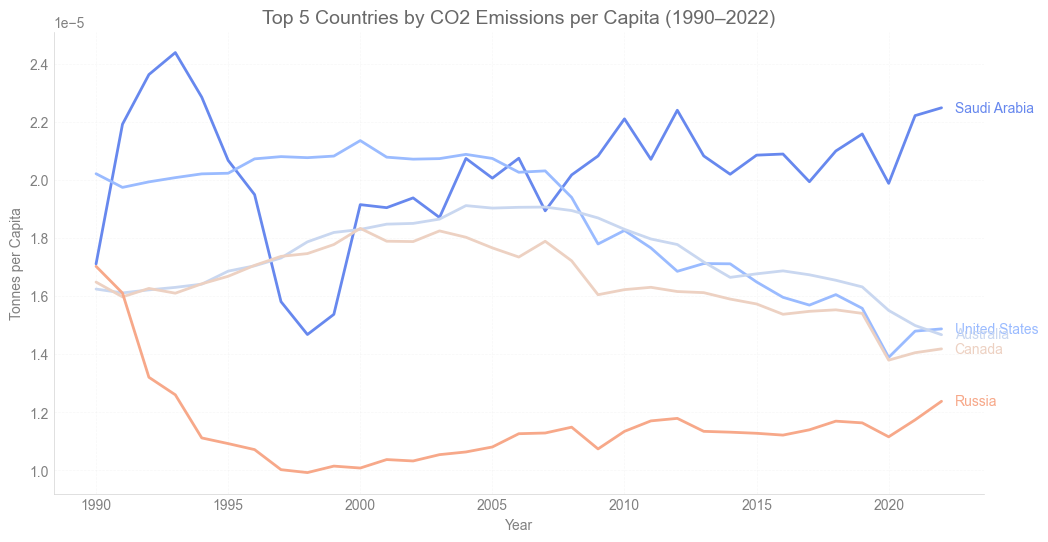

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

final_df['co2_per_capita'] = final_df['co2'] / final_df['population']


recent = final_df[final_df['year'] >= 1990]
latest = recent[recent['year'] == recent['year'].max()]
top5 = latest.nlargest(5, 'co2_per_capita')['country']
data = recent[recent['country'].isin(top5)]

plt.figure(figsize=(12, 6))
palette = sns.color_palette('coolwarm')
sns.set_style("whitegrid")

for i, country in enumerate(top5):
    country_data = data[data['country'] == country]
    plt.plot(country_data['year'], country_data['co2_per_capita'], label=country, linewidth=2, color=palette[i])
    plt.text(
        x=country_data['year'].max() + 0.5,
        y=country_data['co2_per_capita'].iloc[-1],
        s=country,
        color=palette[i],
        fontsize=10,
        va='center'
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.tick_params(colors='gray')
ax.xaxis.label.set_color('gray')
ax.yaxis.label.set_color('gray')

plt.title('Top 5 Countries by CO2 Emissions per Capita (1990–2022)', fontsize=14, color='dimgrey')
plt.xlabel('Year')
plt.ylabel('Tonnes per Capita')
plt.grid(True, linestyle='--', alpha=0.15)



Ο άξονας x μας δείχνει την αύξηση το έτος, ενώ ο άξονας y τις εκπομπές CO₂ ανά κεφαλή (σε τόνους). Οι γραμμές αντιπροσωπεύουν τις χώρες, δείχνοντας πώς μεταβλήθηκαν οι εκπομπές τους ανά άτομο με την πάροδο του χρόνου. Φαίνεται πως η Σαουδική Αραβία είχε τις υψηλότερες κατά κεφαλήν εκπομπές για το μεγαλύτερο μέρους της περιόδου. Αν εξαιρέσουμε κάποιες διακυμάνσεις, οι εκπομπές παραμένουν σταθερά υψηλές (> 2 τόνους κατά κεφαλήν)

*4ο Διάγραμμα* : CO2 per Capita vs Temperature Change Contribution (2022)
Για την απεικόνηση των κατά κεφαλή εκπομπών CO2 έναντι της συμβολής στην αλλαγή της παγκόσμιας θερμοκρασίας θα χρησιμοποιήσουμε ένα bubble chart. Κάθε χώρα αντιπροσωπεύεται από μια φούσκα, όπου το μέγεθος της φούσκας αντικατοπτρίζει τις συνολικές εκπομπές της και το χρώμα υποδηλώνει το κατά κεφαλήν ΑΕΠ.

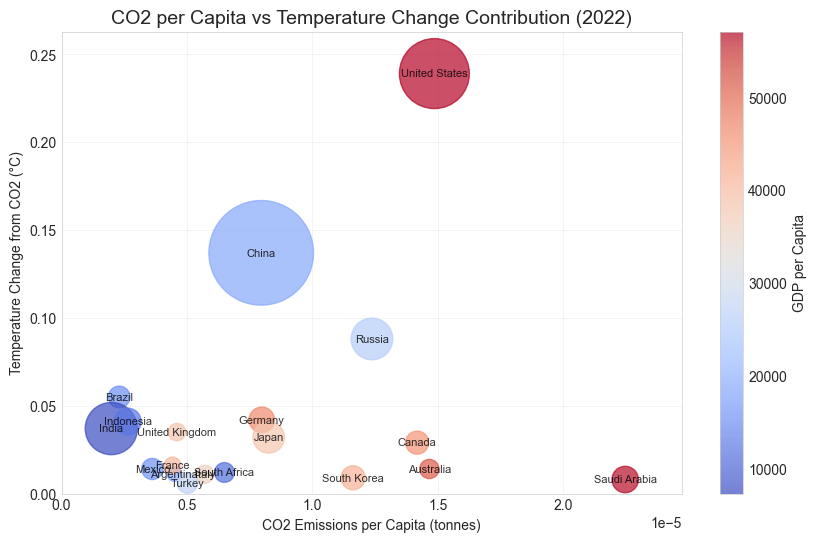

In [27]:
import matplotlib.pyplot as plt

year = final_df['year'].max()
data = final_df[final_df['year'] == year]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['co2_per_capita'], 
    data['temperature_change_from_co2'], 
    s=data['co2']/2,
    c=data['gdp'] / data['population'],
    cmap='coolwarm',
    alpha=0.7
)

for _, row in data.iterrows():
    plt.text(
        row['co2_per_capita'], 
        row['temperature_change_from_co2'], 
        row['country'], 
        fontsize=8,
        ha='center',
        va='center',
        color='black',
        alpha=0.8
    )

plt.title(f'CO2 per Capita vs Temperature Change Contribution ({year})', fontsize=14)
plt.xlabel('CO2 Emissions per Capita (tonnes)')
plt.ylabel('Temperature Change from CO2 (°C)')
plt.xlim(0, data['co2_per_capita'].max() * 1.1)
plt.ylim(0, data['temperature_change_from_co2'].max() * 1.1)
plt.colorbar(scatter, label='GDP per Capita')
plt.grid(alpha=0.3)
plt.show()


Οι Ηνωμένες Πολιτείες ξεχωρίζουν με τη μεγαλύτερη συμβολή στην παγκόσμια αύξηση της θερμοκρασίας (~0,24°C), τις υψηλές κατά κεφαλήν εκπομπές και ένα από τα μεγαλύτερα κατά κεφαλήν ΑΕΠ. Η Κίνα, παρά τις χαμηλότερες κατά κεφαλήν εκπομπές, έχει πολύ μεγάλη φούσκα και υψηλή συνεισφορά στη θερμοκρασία λόγω του τεράστιου πληθυσμού. Η Σαουδική Αραβία έχει τις υψηλότερες κατά κεφαλήν εκπομπές, αλλά συμβάλλει λιγότερο στην υπερθέρμανση του πλανήτη συνολικά, καθώς ο πληθυσμός της είναι σχετικά μικρός. <br>
Στο άλλο άκρο, χώρες όπως η Ινδία και η Ινδονησία παρουσιάζουν πολύ χαμηλές κατά κεφαλήν εκπομπές και μέτρια συνεισφορά στη θερμοκρασία. Οι χώρες αυτές είναι επίσης μεταξύ των χαμηλότερων σε όρους κατά κεφαλήν ΑΕΠ, όπως φαίνεται από το χρώμα. 

In [28]:
import requests

def get_country_coords(country_name):
    url = f"https://restcountries.com/v3.1/name/{country_name}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()[0]
        coords = data['latlng']
        return (coords[0], coords[1]) 
    return None

country_coords = {}
for country in g20_countries:
    coords = get_country_coords(country)
    if coords:
        country_coords[country] = coords
    else:
        print(f"Could not find coordinates for {country}")



Για το παραπάνω cell block αξιοποίησα το chatGPT ( https://chatgpt.com/share/682b7082-a29c-800e-a2eb-f0d96f6385cf )

*Διάγραμμα 5* : Fuel dominance in CO₂ emissions by country
Για την απεικόνηση του κυρίαρχου καυσίμου στις εκπομπές CO₂ ανά χώρα θα χρησιμοποιήσουμε ένα διάγραμμα χάρτη.
Κάθε χώρα ταξινομείται με βάση το αν το πετρέλαιο, το φυσικό αέριο ή ο άνθρακας είναι η κυρίαρχη πηγή εκπομπών CΟ2. Η ταξινόμηση βασίζεταιως εξής: ένα καύσιμο είναι κυρίαρχο μόνο εάν η συνεισφορά του σε CO2 είναι τουλάχιστον 1,2 μεγαλύτερη από κάθε ένα από τα άλλα δύο.


In [30]:
import folium

recent_df['total_co2'] = recent_df['oil_co2'] + recent_df['gas_co2'] + recent_df['coal_co2']
recent_df['oil_pct'] = recent_df['oil_co2'] / recent_df['total_co2']
recent_df['gas_pct'] = recent_df['gas_co2'] / recent_df['total_co2']
recent_df['coal_pct'] = recent_df['coal_co2'] / recent_df['total_co2']
recent_df['dominance'] = 'Balanced'

def dominance(row):
    oil = row['oil_co2']
    gas = row['gas_co2']
    coal = row['coal_co2']

    if (oil > 1.2 * gas) and (oil > 1.2 * coal):
        return 'Oil'
    elif (gas > 1.2 * oil) and (gas > 1.2 * coal):
        return 'Gas'
    elif (coal > 1.2 * oil) and (coal > 1.2 * gas):
        return 'Coal'
    else:
        return 'Balanced'

recent_df['dominance'] = recent_df.apply(dominance, axis=1)

colors = {'Oil': '#9EE493', 'Gas': '#B9E6FF', 'Coal' : '#65655E','Balanced': 'Orange'}

m = folium.Map(location=[20, 0], zoom_start=2)

for _, row in recent_df.iterrows():
    country = row['country']
    if country in country_coords and row['total_co2'] > 0:
        lat, lon = country_coords[country]
        color = colors[row['dominance']]
        
        popup = (f"{country}<br>"
                 f"Oil CO₂: {row['oil_co2']:.0f} Mt ({row['oil_pct']*100:.1f}%)<br>"
                 f"Gas CO₂: {row['gas_co2']:.0f} Mt ({row['gas_pct']*100:.1f}%)<br>"
                 f"Dominance: {row['dominance']}")
        
        folium.CircleMarker(
            location=[lat, lon],
            radius=8,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=popup,
            tooltip=country
        ).add_to(m)
    
    legend_html = '''
<div style="
    position: fixed; 
    bottom: 30px; left: 30px; width: 140px; height: 125px; 
    background: white; border: 1px solid grey; 
    z-index:9999; font-size:14px; padding: 10px; 
    border-radius: 5px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
">
<b>Fuel Dominance</b><br>
<div><span style="background:#9EE493; width:15px; height:15px; display:inline-block; margin-right:8px;"></span>Oil Dominant</div>
<div><span style="background:#B9E6FF; width:15px; height:15px; display:inline-block; margin-right:8px;"></span>Gas Dominant</div>
<div><span style="background:#65655E; width:15px; height:15px; display:inline-block; margin-right:8px;"></span>Coal Dominant</div>
<div><span style="background:orange; width:15px; height:15px; display:inline-block; margin-right:8px;"></span>Balanced</div>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Save and show
m